In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynamic_drone import *

In [3]:
import matplotlib.pyplot as plt


In [12]:
def simulation(drone_controller, xyz_target_arr, psi_arr, dt = 1/30, show=True, callback=None):
    '''
    omega_arr: length x 4 matrix
    '''
    
    assert xyz_target_arr.shape[0] == psi_arr.shape[0]
    length = xyz_target_arr.shape[0]
    
    #length = omega_arr.shape[0]
    xyz_arr = np.zeros([length, 3])
    rpy_arr = np.zeros([length, 3])
    v_xyz_arr = np.zeros([length, 3])
    v_rpy_arr = np.zeros([length, 3])
    a_xyz_arr = np.zeros([length, 3])
    a_rpy_arr = np.zeros([length, 3])
    omega_arr = np.zeros([length, 4])
    
    #dt=1/30
    
    for i in range(length):
        #omega = np.array([1.0, 1.0, 1.0, 1.0]) * 2
        #omega = omega_arr[i]
        #a_xyz, a_rpy = drone.step(omega, dt)
        
        xyz_target = xyz_target_arr[i]
        psi_target = psi_arr[i]
        
        omega, a_xyz, a_rpy = drone_controller.step(xyz_target, psi_target, dt)
        
        drone = drone_controller.drone
        
        xyz_arr[i,:] = drone.xyz
        rpy_arr[i,:] = drone.rpy
        v_xyz_arr[i,:] = drone.v_xyz
        v_rpy_arr[i,:] = drone.v_rpy
        a_xyz_arr[i,:] = a_xyz
        a_rpy_arr[i,:] = a_rpy
        omega_arr[i,:] = omega
        
        if callback:
            callback(drone.xyz, drone.rpy, drone.v_xyz, drone.v_rpy, a_xyz, a_rpy)
    
    
    name_list = ['X','Y','Z',
                 'r','p','y',
                 "v_X","v_Y","v_Z",
                 "v_r","v_p","v_y",
                 'a_X','a_Y','a_Z',
                 'a_r','a_p','a_y',
                 'omega1','omega2','omega3','omega3']
    arr_list = [xyz_arr[:,0], xyz_arr[:,1], xyz_arr[:,2],
                rpy_arr[:,0], rpy_arr[:,1], rpy_arr[:,2],
                v_xyz_arr[:,0], v_xyz_arr[:,1], v_xyz_arr[:,2],
                v_rpy_arr[:,0], v_rpy_arr[:,1], v_rpy_arr[:,2],
                a_xyz_arr[:,0], a_xyz_arr[:,1], a_xyz_arr[:,2],
                a_rpy_arr[:,0], a_rpy_arr[:,1], a_rpy_arr[:,2],
                omega_arr[:,0], omega_arr[:,1], omega_arr[:,2], omega_arr[:,3]]
    
    
    for name, arr in zip(name_list, arr_list):
        if isinstance(show, (list, tuple, set)) or not show:
            if name not in show:
                continue
        plt.plot(arr)
        plt.title(name)
        plt.show()
            
    return {'name_list': name_list,
            'arr_list': arr_list,
            'xyz_arr': xyz_arr,
            'rpy_arr': rpy_arr,
            'v_xyz_arr': v_xyz_arr,
            'v_rpy_arr': v_rpy_arr,
            'a_xyz_arr': a_xyz_arr,
            'a_rpy_arr': a_rpy_arr,
            'omega_arr': omega_arr}


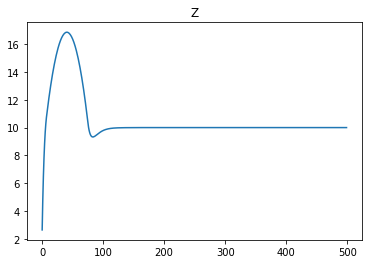

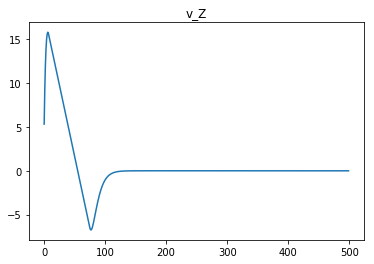

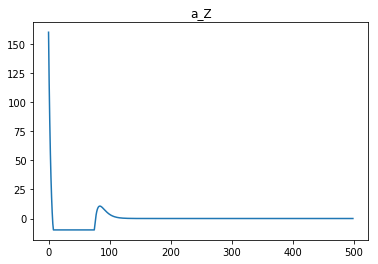

In [13]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(16.0, 0.01, 0.0001)
controller_rpy = PIDControler(16.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

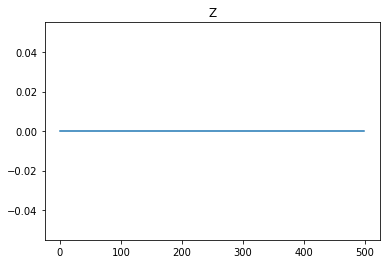

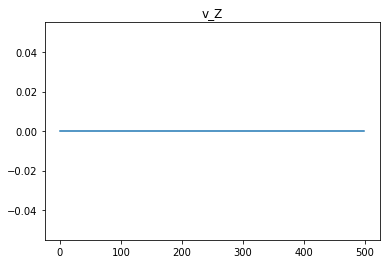

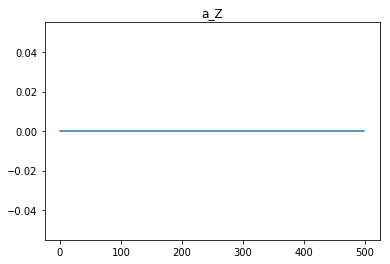

In [14]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(32.0, 0.01, 0.0001)
controller_rpy = PIDControler(32.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

这个倒是开始超调越来越大了随着比例系数增加，之前不是这样。

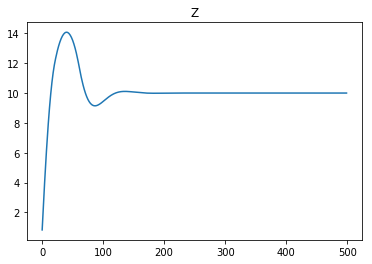

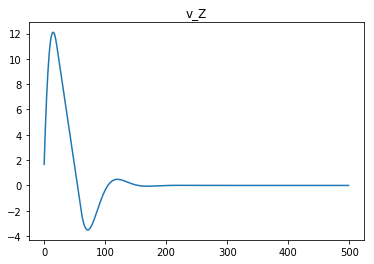

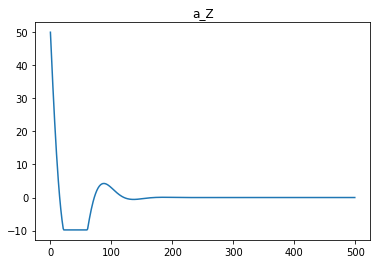

In [15]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(5.0, 0.01, 0.0001)
controller_rpy = PIDControler(5.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

39.8 0.0 0.0 0.0
0.0 0.0
38.270336183333335 0.0 0.0 0.0
0.0 0.0
36.74863588848165 0.0 0.0 0.0
0.0 0.0
35.208126074724454 0.0 0.0 0.0
0.0 0.0
33.65481464315333 0.0 0.0 0.0
0.0 0.0
32.0944705528799 0.0 0.0 0.0
0.0 0.0
30.532617288959614 0.0 0.0 0.0
0.0 0.0
28.974525911578514 0.0 0.0 0.0
0.0 0.0
27.425209269827334 0.0 0.0 0.0
0.0 0.0
25.889417344973047 0.0 0.0 0.0
0.0 0.0
24.371633686088167 0.0 0.0 0.0
0.0 0.0
22.876072898991538 0.0 0.0 0.0
0.0 0.0
21.406679147767193 0.0 0.0 0.0
0.0 0.0
19.96712562665455 0.0 0.0 0.0
0.0 0.0
18.5608149588394 0.0 0.0 0.0
0.0 0.0
17.190880477614844 0.0 0.0 0.0
0.0 0.0
15.860188344518706 0.0 0.0 0.0
0.0 0.0
14.571340458382936 0.0 0.0 0.0
0.0 0.0
13.326678108743742 0.0 0.0 0.0
0.0 0.0
12.128286326752523 0.0 0.0 0.0
0.0 0.0
10.977998886589194 0.0 0.0 0.0
0.0 0.0
9.877403910403983 0.0 0.0 0.0
0.0 0.0
8.827850029993735 0.0 0.0 0.0
0.0 0.0
7.83045305874578 0.0 0.0 0.0
0.0 0.0
6.886103127849311 0.0 0.0 0.0
0.0 0.0
5.995472241372321 0.0 0.0 0.0
0.0 0.0
5.15902220552

6.757461670382237e-17 -1.6508454020207222
17.908855370717585 -28.993336719146622 -2.067481988079735e-16 3.064215547965432e-16
5.2965010234359943e-17 -1.6189385708342394
17.9881175538523 -28.568298395667096 -2.102022259956962e-16 3.133296091719886e-16
3.7196438640616805e-17 -1.5881761007031534
18.023884817695155 -28.088598191146385 -2.580651741684252e-16 3.20237663547434e-16
8.935979299479922e-17 -1.558409769883243
18.017353462689734 -27.556513939070904 -2.6447979608848166e-16 3.271457179228794e-16
7.601256527024216e-17 -1.5294429337879631
17.970512468664705 -26.97441772840218 -2.2648549702353184e-16 3.3405377229832484e-16
-5.421651754127594e-18 -1.501037757016537
17.886026583429103 -26.344731128173425 -2.447424978729233e-16 3.1135587935043275e-16
-4.933241669269585e-18 -1.4729225077067185
17.767099458787023 -25.66988362850949 -2.1957744264808643e-16 2.866842565809848e-16
-6.770688470230707e-17 -1.4447987803554512
17.617327340937358 -24.952275689208683 -2.812564995717062e-16 2.600389039

5.063050853984691e-16 0.5768245382307534
16.89550017766771 8.750977787176245 1.9737298215558712e-18 1.2572658963310663e-15
4.06628331656312e-16 0.5179472460213514
16.56936270139134 7.545895966171509 -4.934324553889549e-18 1.2676279778942344e-15
3.312066742467318e-16 0.45541256487419846
16.16845166761324 6.3151217183806745 -4.1448326252672476e-17 1.2464103823125093e-15
2.3949133814373947e-16 0.3905829604593735
15.708452323176449 5.064905929758205 -5.921189464667466e-18 1.2212453270876724e-15
1.6945260995482506e-16 0.3224318873403829
15.204539432264601 3.801054026947715 2.9605947323337852e-18 1.1921328122197238e-15
8.309888039342393e-17 0.24999468375094192
14.671058977738854 2.528928858403969 -3.8981163975727686e-17 1.166474324539498e-15
-1.989671763438826e-17 0.1723753453817643
14.121250027054527 1.2534673303924218 -4.638265080656207e-17 1.129960322840715e-15
-1.2248868363146047e-16 0.08876461559641936
13.567095491059275 -0.02078294901843405 -5.378413763739645e-17 1.0746958878371517e-15

11.48904612834952 23.44820015663015 9.37521665239018e-17 6.638146822347661e-15
3.0361949154321956e-15 2.0409179225741907
11.86551834912589 24.12788233948003 8.487038232690054e-17 6.66232501266172e-15
2.5297674434630384e-15 2.0334452848625433
12.275948606309514 24.753000940023462 8.240322004995574e-17 6.645054876723106e-15
2.0285643588737133e-15 2.016381929727294
12.718680120238544 25.320720527719068 8.684411214845636e-17 6.584362684710264e-15
1.5386832626312526e-15 1.9908292596672499
13.191558832494353 25.82818021855188 9.128500424695698e-17 6.4930776804633065e-15
1.0509533465443718e-15 1.9579323828606314
13.691820550728892 26.27252837903487 1.0312738317629197e-16 6.362811512240622e-15
5.830831463654091e-16 1.918848430834586
14.21598518563281 26.65096376416737 1.0066022089934718e-16 6.192083882676042e-15
9.693697976332062e-17 1.8747180315791125
14.759766015586859 26.96078323243124 9.029813933617904e-17 5.979414494403401e-15
-3.9150510563577507e-16 1.8266402871129295
15.318003995348068 

20.491724453017728 22.708573443257432 2.5559801189147947e-16 -1.894287196238211e-14
1.8927215250305904e-14 1.1081826468690994
20.402505767653913 21.84874168239792 2.5165055224836777e-16 -1.6766341401661414e-14
2.131738234955214e-14 1.0708852104351254
20.254797543519388 20.934068143398743 2.319132540328094e-16 -1.4479281970933592e-14
2.373107466990158e-14 1.0335362818818543
20.054694906104658 19.968233897442975 2.546111469807015e-16 -1.2038271614124414e-14
2.622716861232864e-14 0.9956887397656016
19.808953171752375 18.95481658485448 2.6349293117770275e-16 -9.441336601412326e-15
2.874388839147352e-14 0.9568812859774996
19.524657375009394 17.897235835641034 2.72374715374704e-16 -6.760518071284115e-15
3.1287122899408066e-14 0.9166478823105301
19.20892553250096 16.79871303106303 2.9605947323337403e-16 -3.939564723825439e-15
3.3862664165711625e-14 0.8745264279691273
18.868660349727993 15.662244823636719 3.355340696644907e-16 -9.9229266778719e-16
3.6457268191528287e-14 0.8300666042707427
18.5

9.81532427389962 15.543891405026693 1.1546319456101476e-16 -8.985701072106171e-14
6.710788157395774e-14 1.583635035508727
9.874780712603577 16.607898370991506 1.218778164810712e-16 -8.181159453594474e-14
7.943006254819272e-14 1.6818498409584106
9.977087258038575 17.636894499946614 1.065814103640135e-16 -7.303540488439672e-14
9.109771823807039e-14 1.7677398266449464
10.120629617222276 18.628976416520242 9.769962616701224e-17 -6.358123903914428e-14
1.019944481713949e-13 1.8406934272961943
10.304156606635477 19.582082234434925 1.0312738317629078e-16 -5.3506335165012524e-14
1.1199747001506115e-13 1.9004061158993666
10.526675128621331 20.494001691839024 9.424559897928952e-17 -4.287977380575592e-14
1.2093930548973185e-13 1.9468637002121585
10.787350734005472 21.362386016930813 9.227186915773368e-17 -3.179037280334447e-14
1.287722810052206e-13 1.9803181099497547
11.0854098173696 22.184758478591434 9.029813933617785e-17 -2.031806821555119e-14
1.3542279590041306e-13 2.0012574044696474
11.420040

20.462296247589588 -24.385888453762238 -8.141635513918022e-17 -1.8713080467907503e-13
3.376208294677869e-13 -1.191747405017403
20.531643081601022 -23.662339586829845 -8.042949022840231e-17 -1.5082503147646625e-13
3.665827721150566e-13 -1.1524815375362885
20.532322486233262 -22.87504078178083 -4.98366779942869e-17 -1.1312876561457137e-13
3.954781868391803e-13 -1.1140990405307698
20.46750899271067 -22.02763360236406 -1.7270135938615654e-17 -7.41545096932191e-14
4.2434389215043466e-13 -1.076224449697763
20.341829947548675 -21.123839130923656 2.467162276942676e-18 -3.399108155437943e-14
4.531678769598256e-13 -1.0384434038329584
20.161050461661908 -20.167373462251536 -6.4146219200585844e-18 7.283556473996168e-15
4.819016324883222e-13 -1.000313624560469
19.9317355903078 -19.161874191154254 1.3322676295499746e-17 4.952926957457724e-14
5.10386808979392e-13 -0.9613750947244201
19.660910089521305 -18.11083993744681 4.4408920984984854e-18 9.273224163861289e-14
5.385419683538058e-13 -0.92115979651

13.602736292994805 -0.04548589196932995 1.519771962597965e-16 -1.2419902143771351e-12
6.66791580768729e-14 -0.0033438780984642383
13.03213711856396 -1.4223812966831422 1.4408227697357317e-16 -1.2018455366716002e-12
1.9074637426884521e-13 -0.10914413221274313
12.478803859479953 -2.7885787021774875 1.4309541206279525e-16 -1.1531541154062732e-12
3.2530200753686037e-13 -0.223465224197674
11.95179194075245 -4.140172936061455 1.4210854715201733e-16 -1.0955108425352797e-12
4.703499496865554e-13 -0.3464060415864971
11.45930675951581 -5.47334955179405 1.1151573491790188e-16 -1.028583638016143e-12
6.254297297696348e-13 -0.47763356603129414
11.00913986733608 -6.784255183256354 1.0115365335473375e-16 -9.520374612116539e-13
7.894114920925093e-13 -0.6162384405147869
10.6343514293922 -8.068830236895495 1.1250259982867978e-16 -8.656157272450101e-13
9.580627775640873e-13 -0.7587515130066248
10.34049678523155 -9.32581437824885 1.3223989804423812e-16 -7.693011659802732e-13
1.1273237685406838e-12 -0.90187

-2.194382515546719e-12 2.011209113714789
12.141937835542217 24.292646479099826 -2.7138785046393053e-16 -6.964284951196635e-12
-1.6596668426190275e-12 2.0007223565244847
12.575309176274414 24.91388799964309 -2.5214398470376115e-16 -6.871078520968393e-12
-1.1255992657831313e-12 1.981174987462545
13.039766120023987 25.47571921501403 -2.3882130840825926e-16 -6.738187785515494e-12
-5.969602982676595e-13 1.9536944896498778
13.532761290710475 25.9752699203024 -2.3191325403281384e-16 -6.566394835279729e-12
-7.782613447655519e-14 1.9194360531677337
14.051061742135618 26.40970521281806 -2.245117672019795e-16 -6.356809399853269e-12
4.284572603986404e-13 1.8795522856199518
14.590650998469734 26.776271224823564 -2.0921536108492178e-16 -6.1107992740024514e-12
9.192760586973221e-13 1.835166314897934
15.146652591157727 27.072347358910392 -2.0033357688792055e-16 -5.829959724855549e-12
1.3927006323975e-12 1.787348537637591
15.713286372714755 27.295504367454654 -2.1316282072803347e-16 -5.516087833415088e

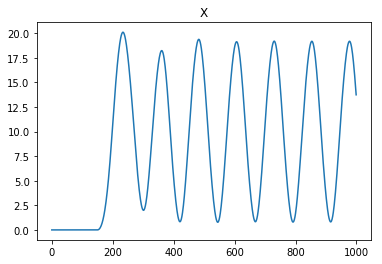

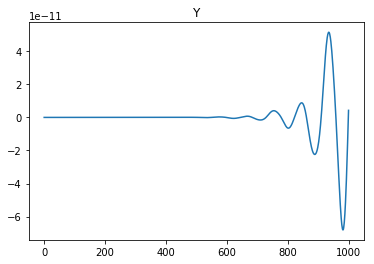

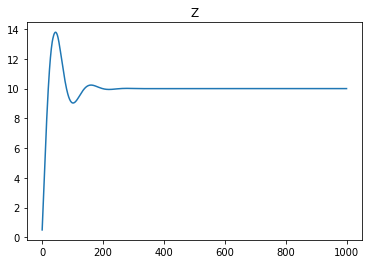

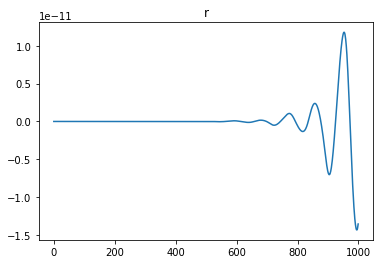

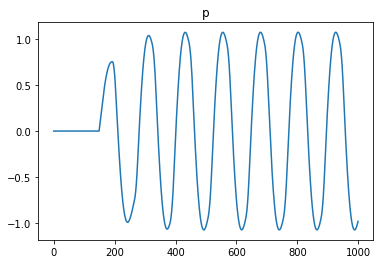

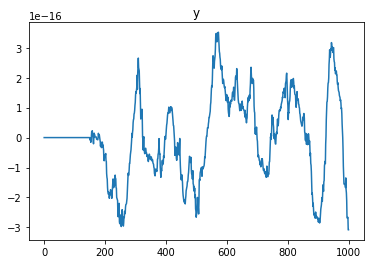

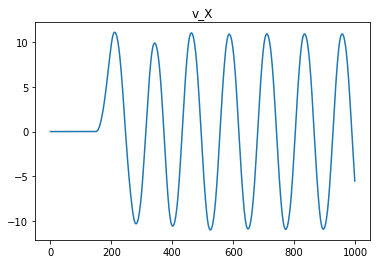

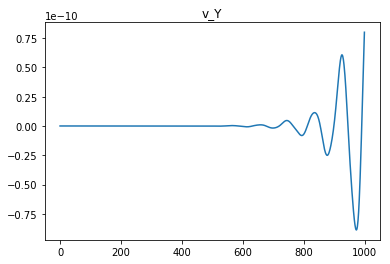

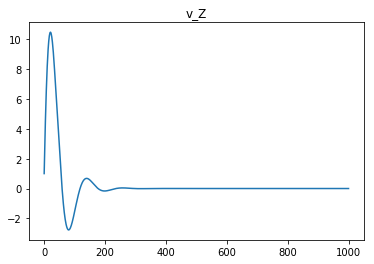

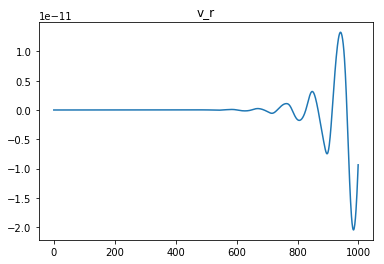

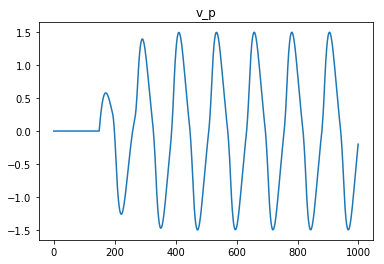

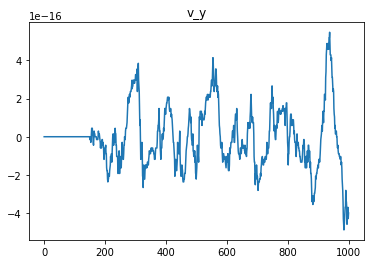

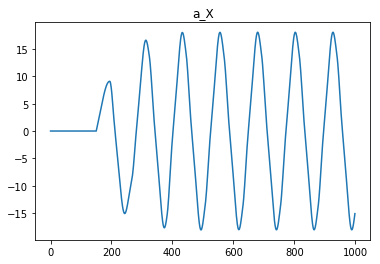

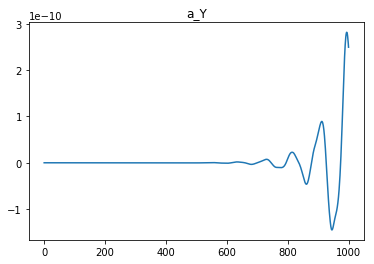

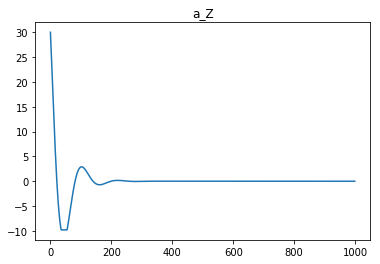

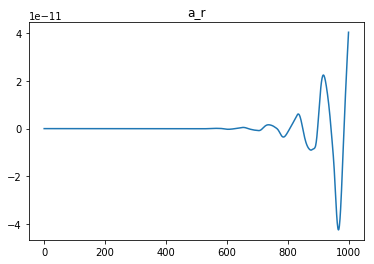

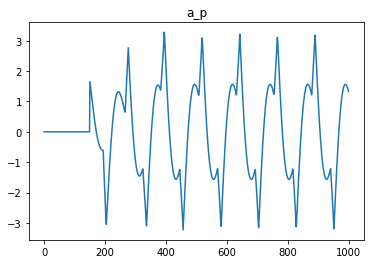

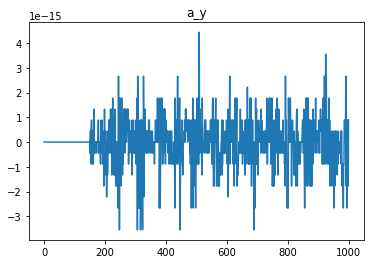

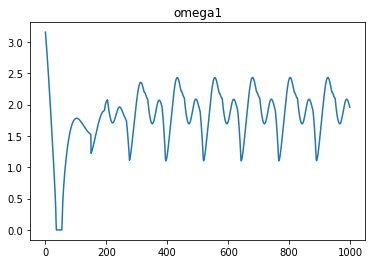

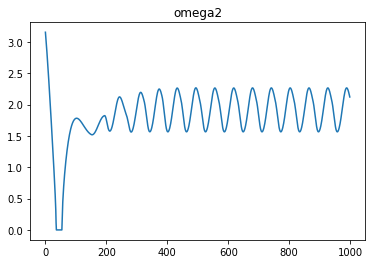

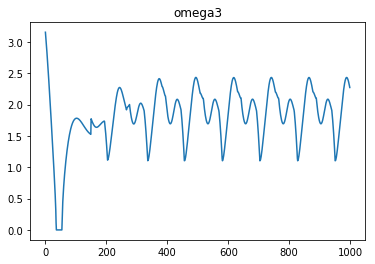

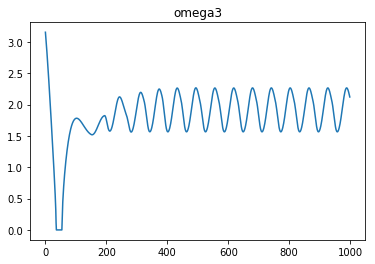

In [45]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(3.0, 0.001, 0.0001)
controller_rpy = PIDControler(3.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 1000

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

In [11]:
%debug

> e:\agent5\robot_experiment\dynamic_drone.py(172)step()
    170                 a_rpy_target[2] * I[2]/l
    171                 ])
--> 172         omega2 = self.U_to_omega2 @ U
    173 
    174         omega = np.sqrt(np.clip(omega2, 0, np.inf))

ipdb> p U
array([59.8, 0.0, 0.0, array([0., 0., 0.])], dtype=object)
ipdb> p U1
59.8
ipdb> p a_rpy_target
array([0.0, 0.0, array([0., 0., 0.])], dtype=object)
ipdb> p rpy
array([0., 0., 0.])
ipdb> p rpy_target
array([0.0, 0.0, array([0., 0., 0.])], dtype=object)
ipdb> q


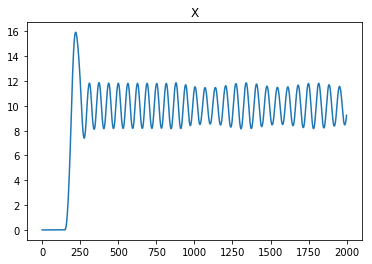

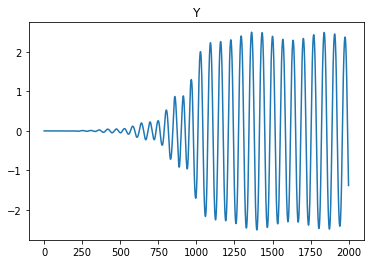

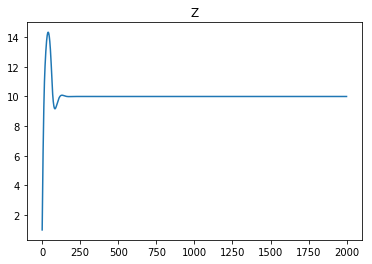

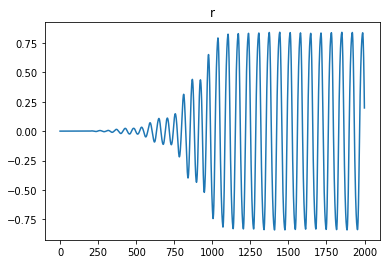

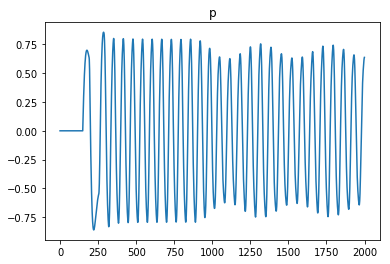

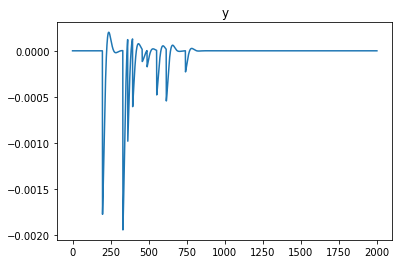

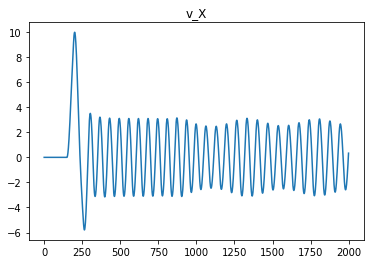

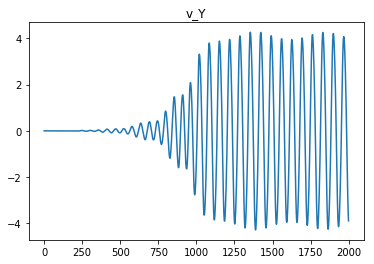

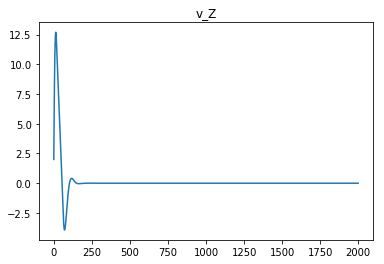

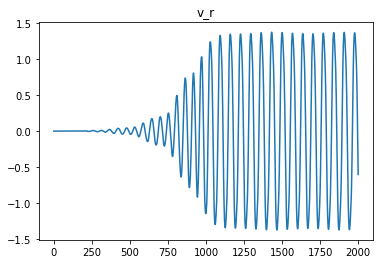

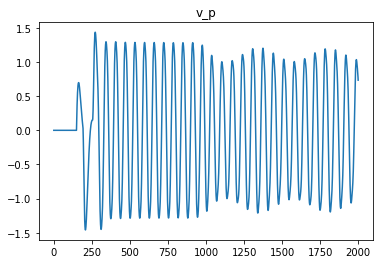

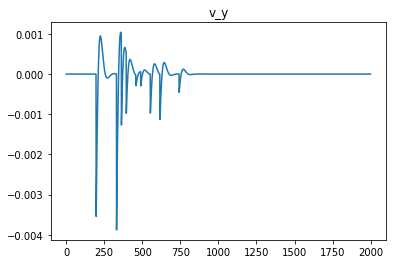

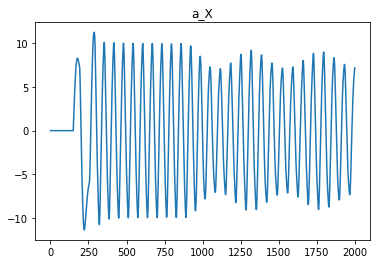

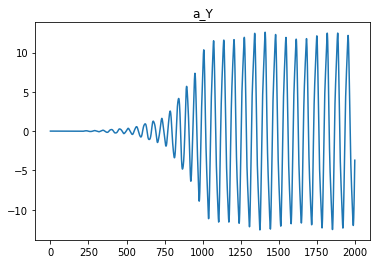

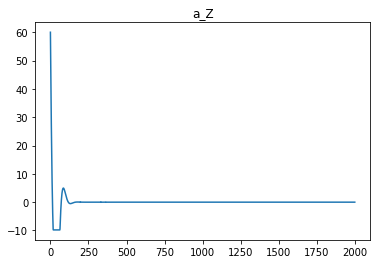

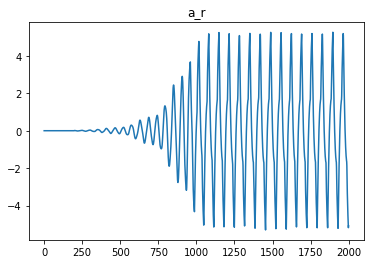

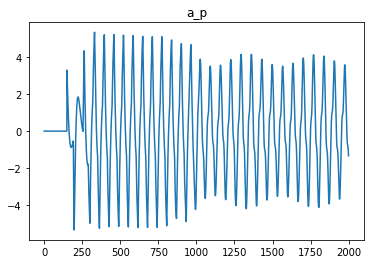

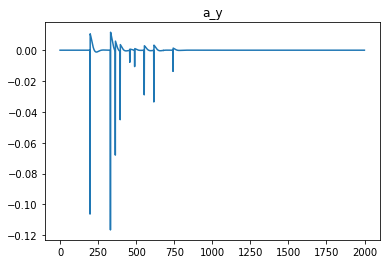

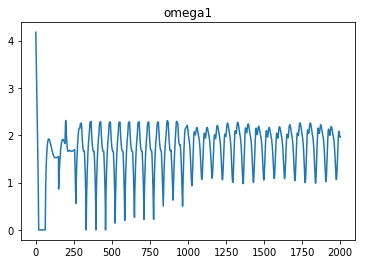

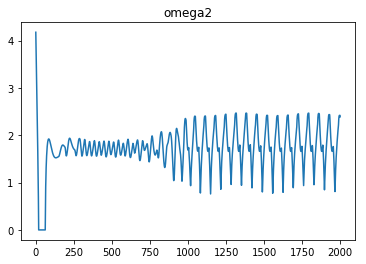

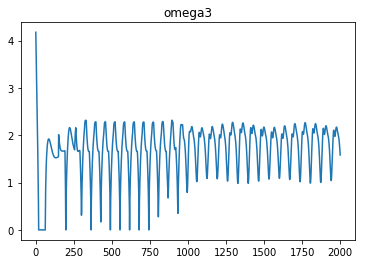

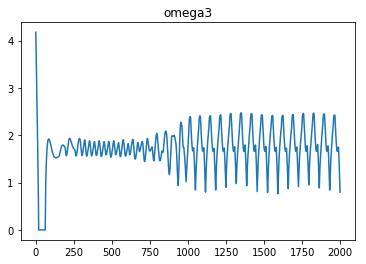

In [48]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(6.0, 0.001, 0.0001)
controller_rpy = PIDControler(6.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 2000

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

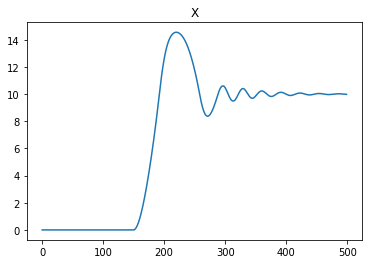

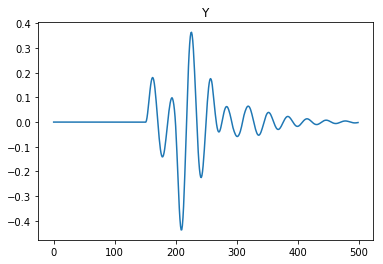

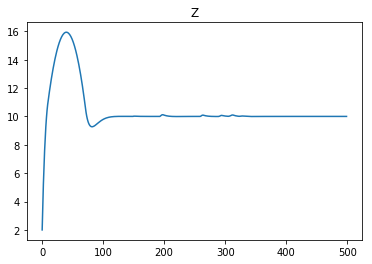

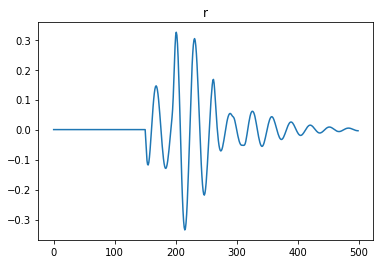

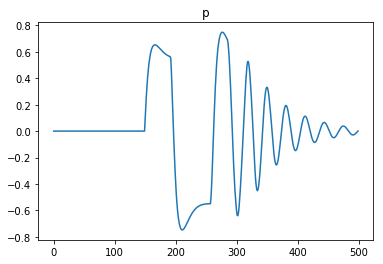

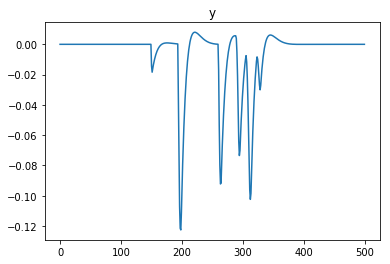

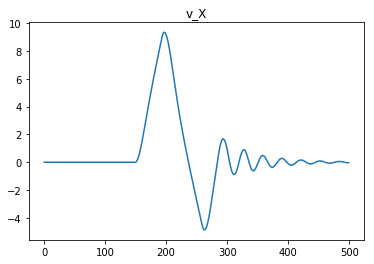

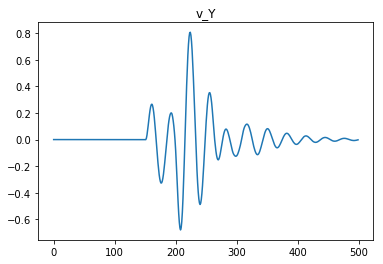

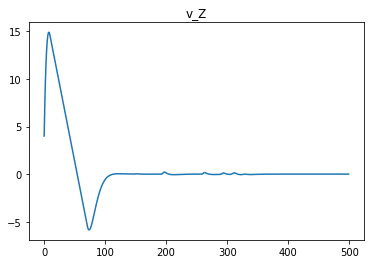

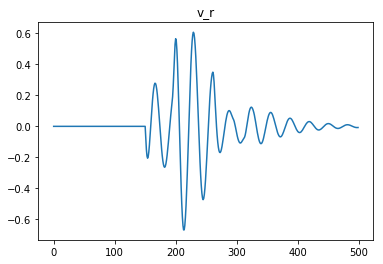

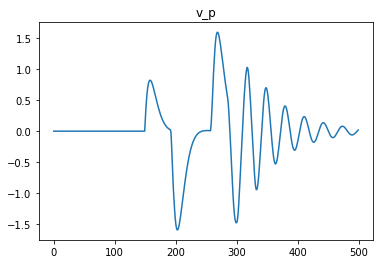

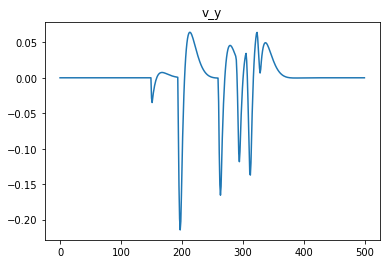

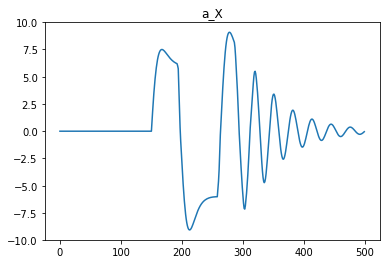

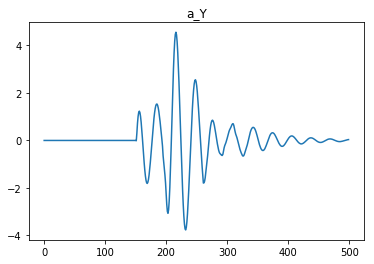

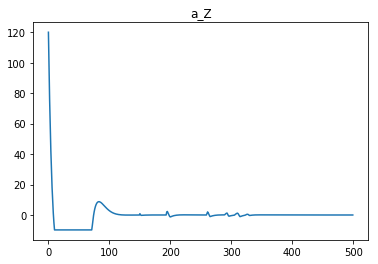

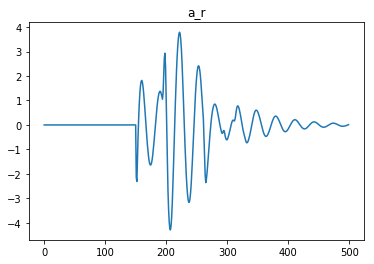

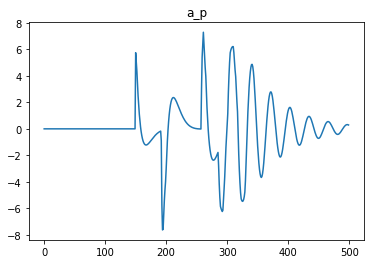

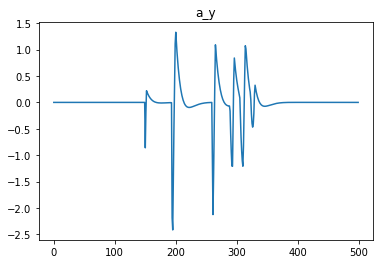

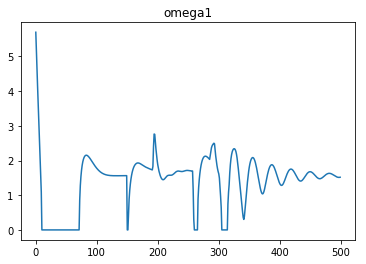

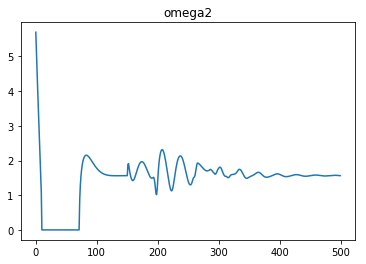

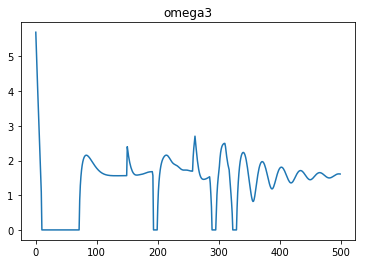

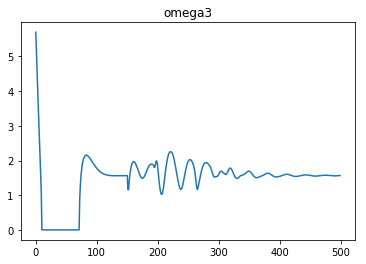

In [50]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

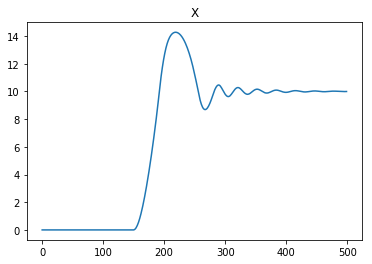

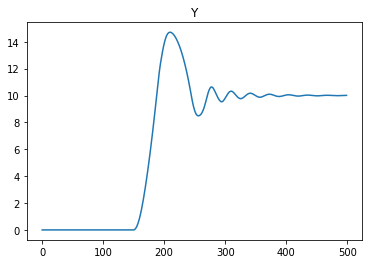

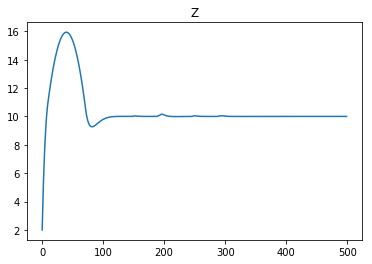

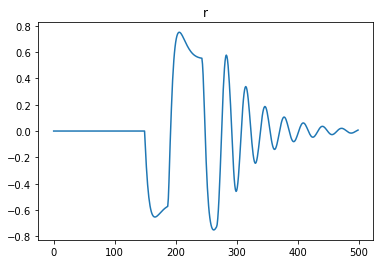

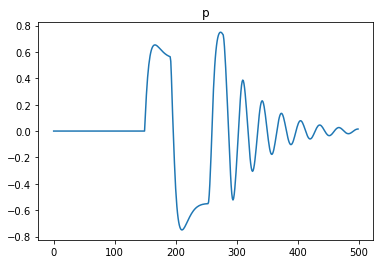

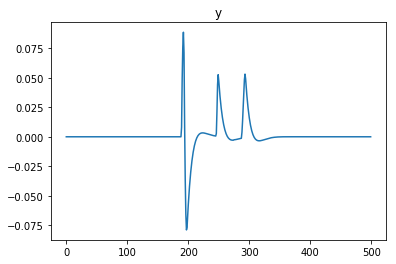

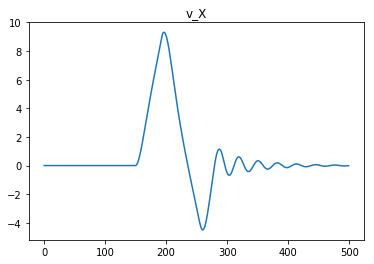

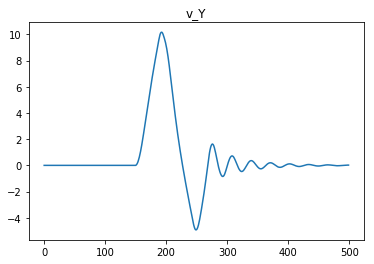

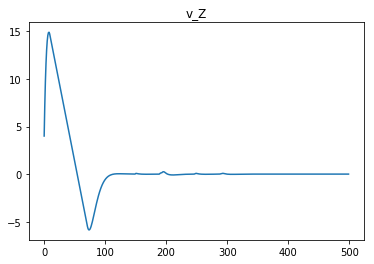

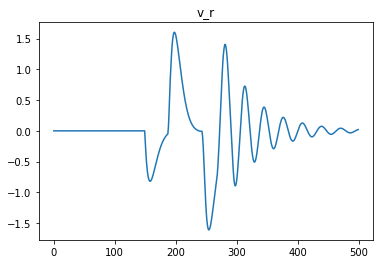

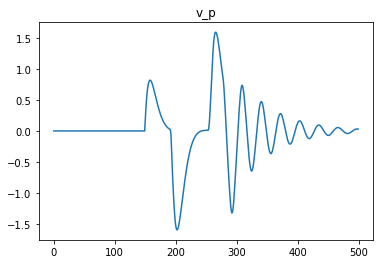

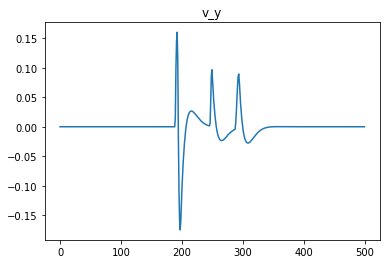

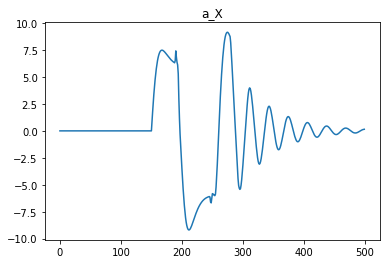

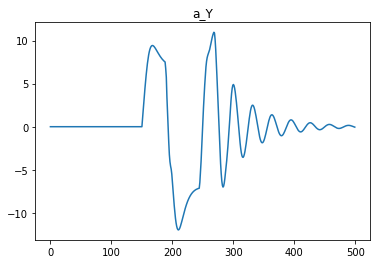

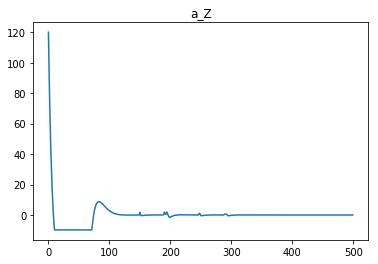

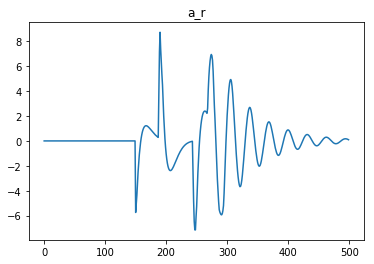

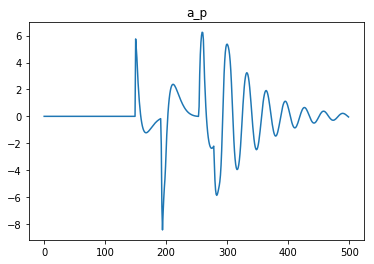

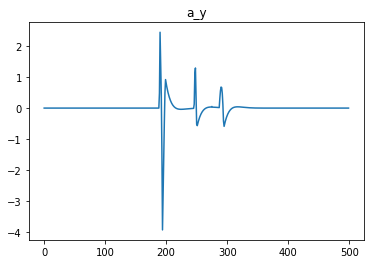

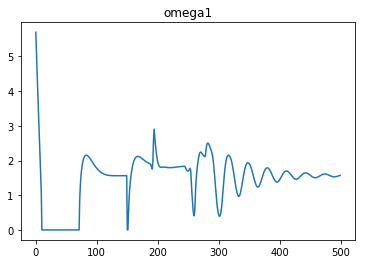

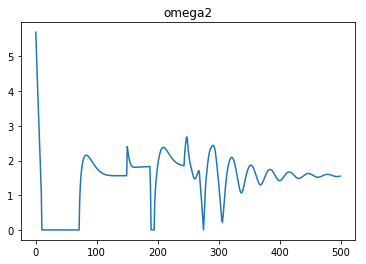

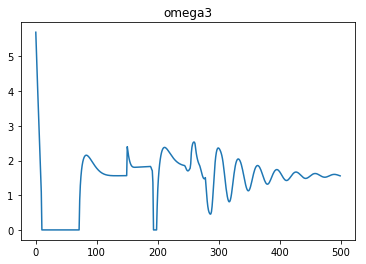

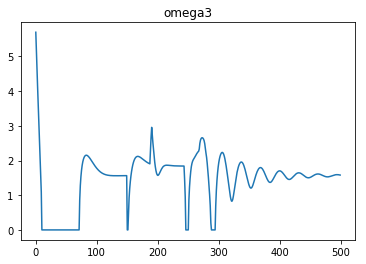

In [51]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10
xyz_target_arr[150:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

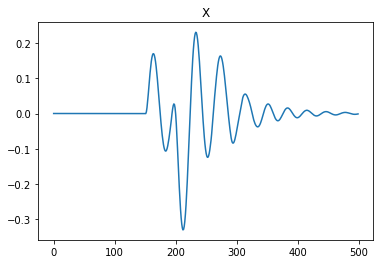

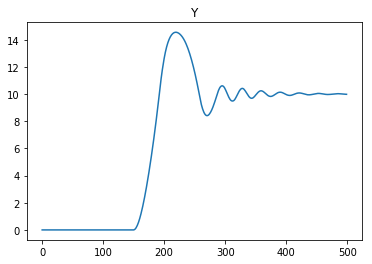

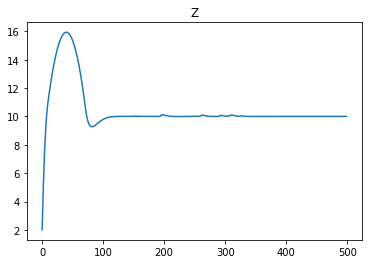

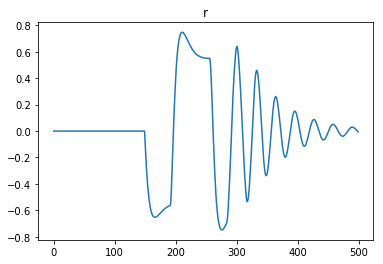

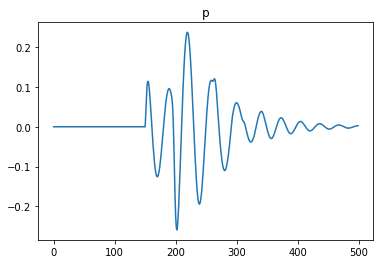

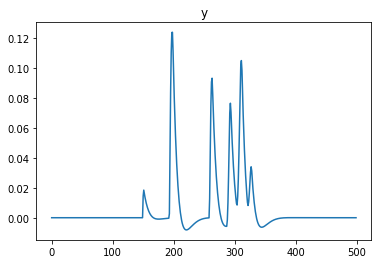

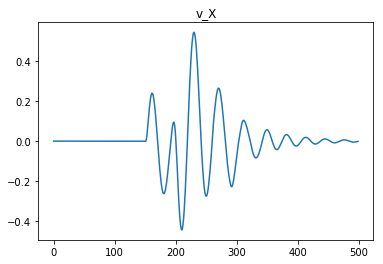

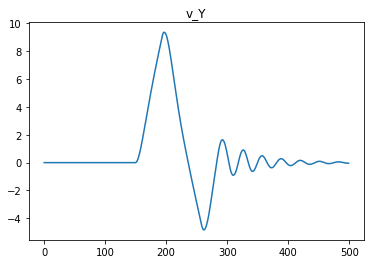

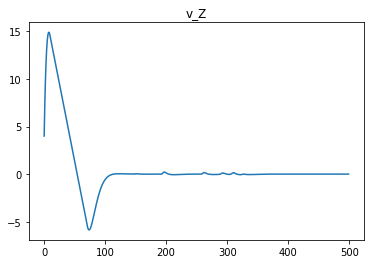

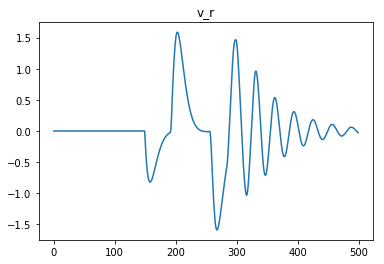

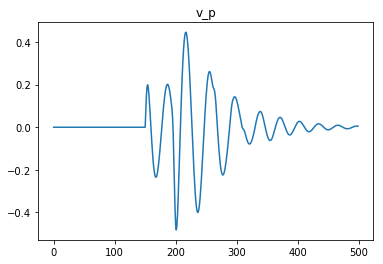

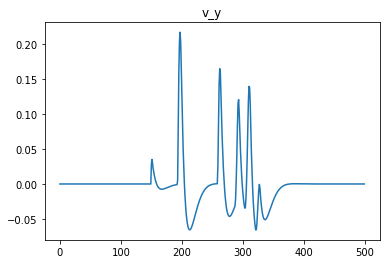

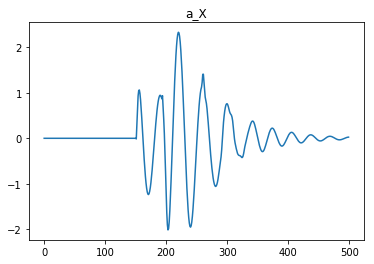

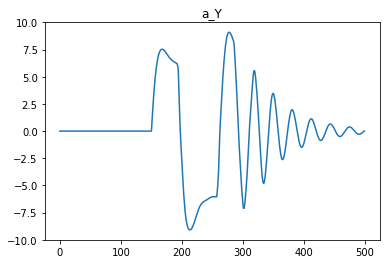

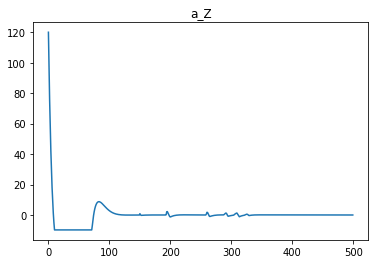

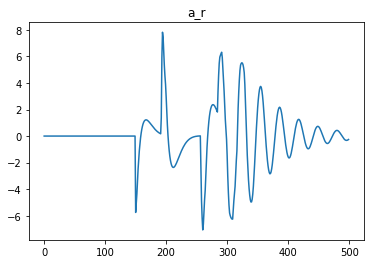

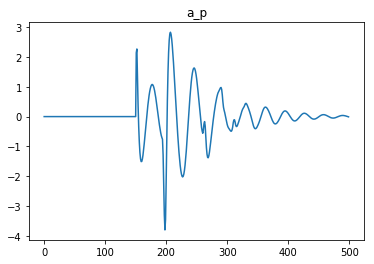

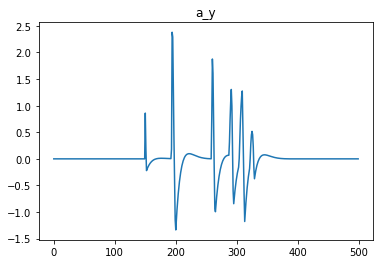

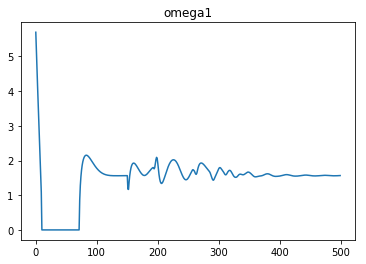

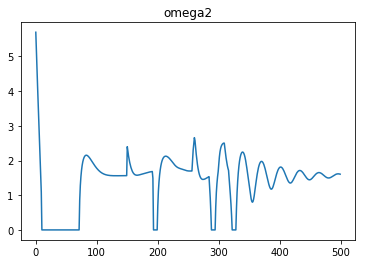

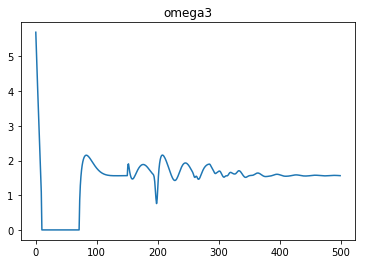

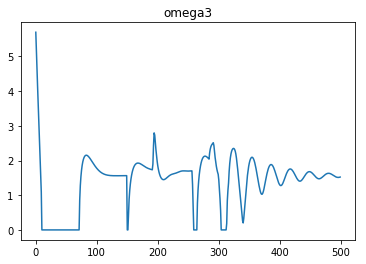

In [52]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#xyz_target_arr[150:,0] = 10
xyz_target_arr[150:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

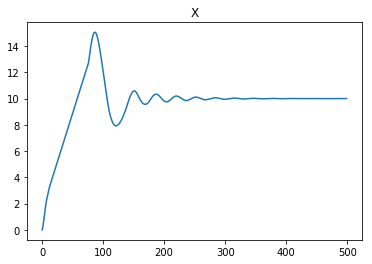

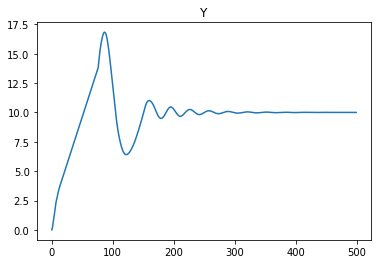

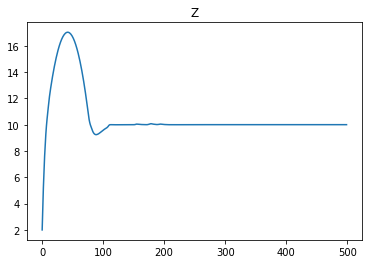

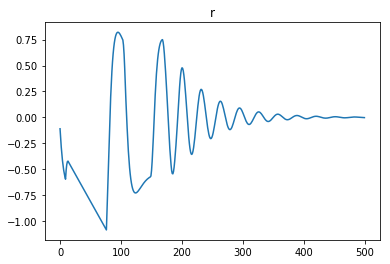

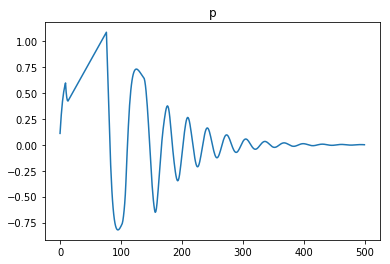

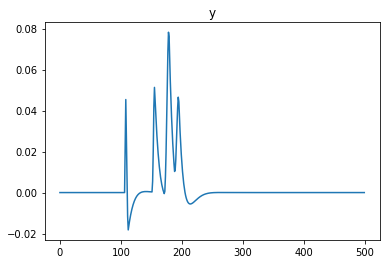

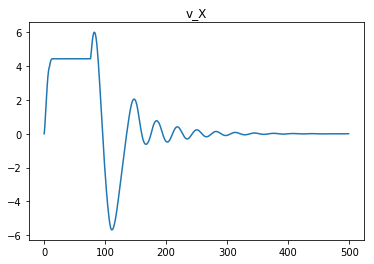

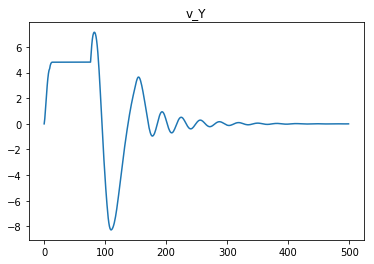

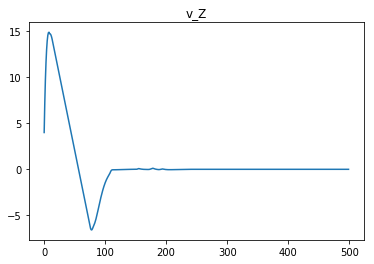

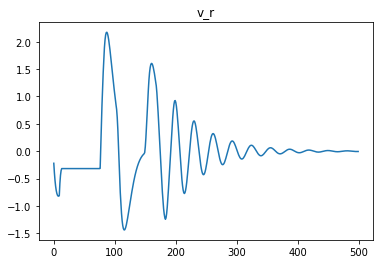

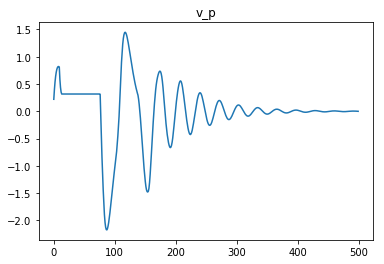

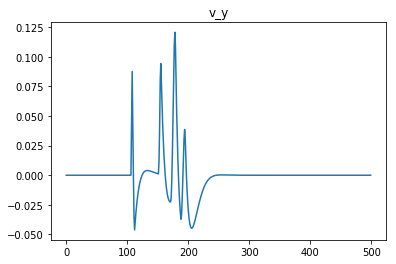

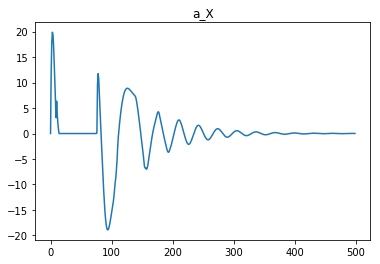

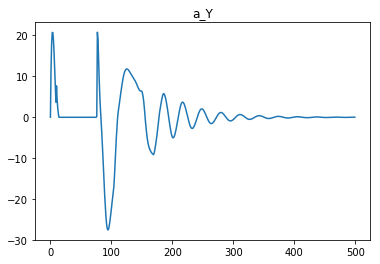

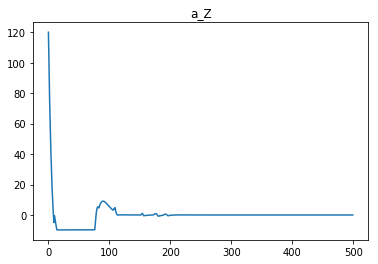

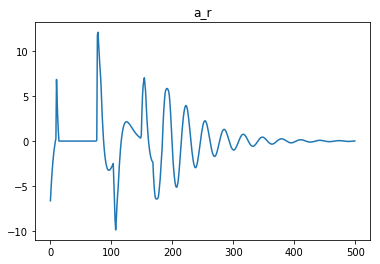

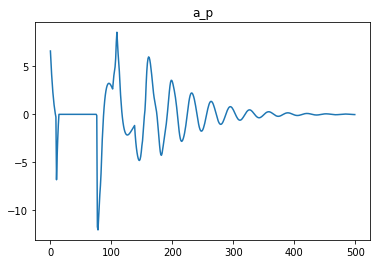

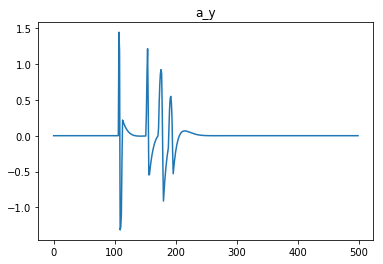

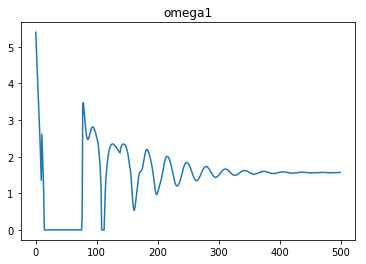

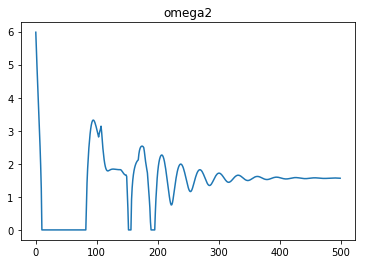

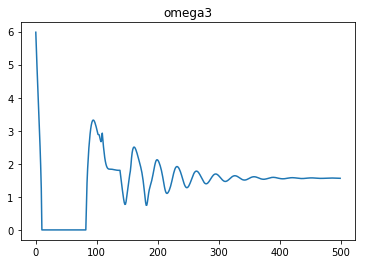

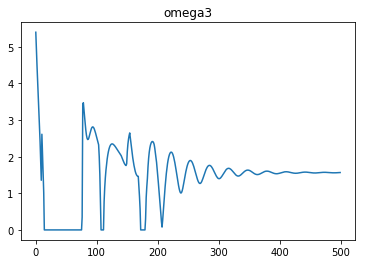

In [54]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

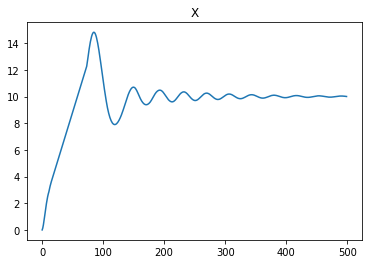

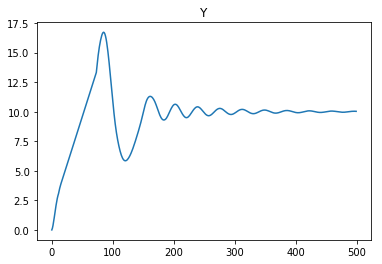

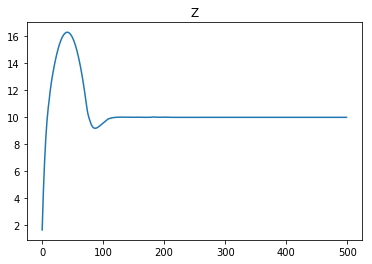

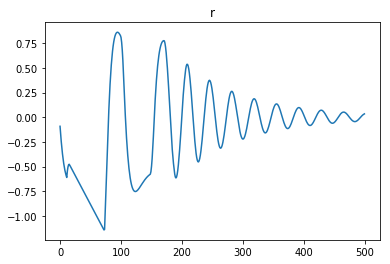

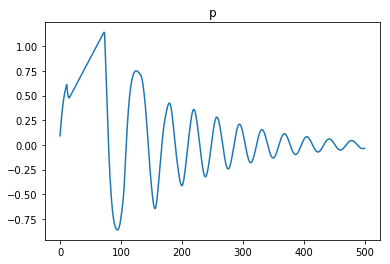

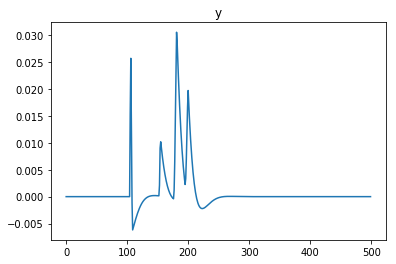

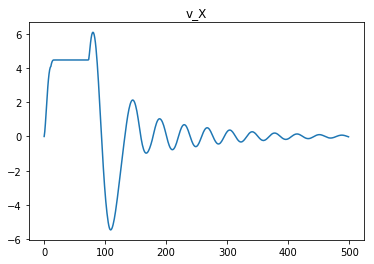

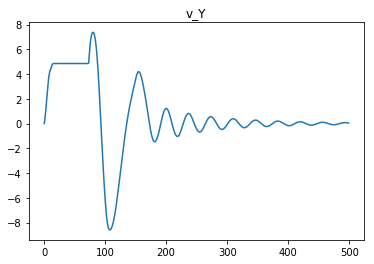

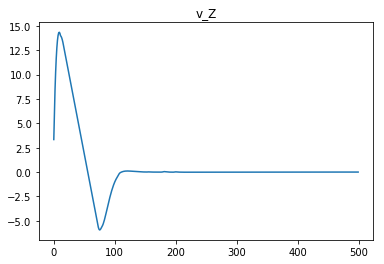

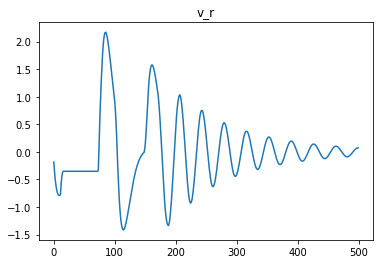

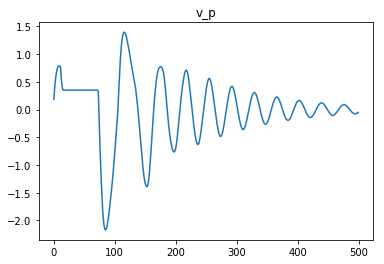

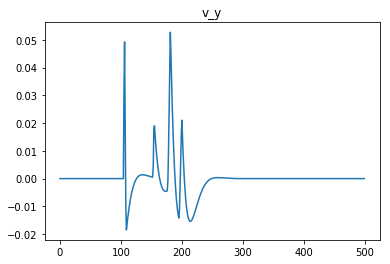

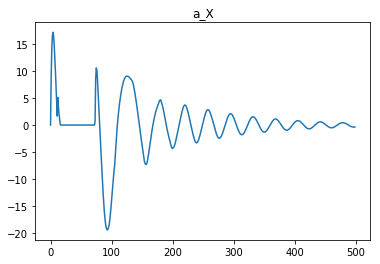

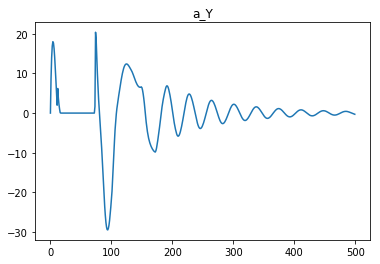

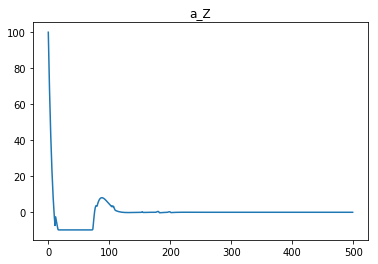

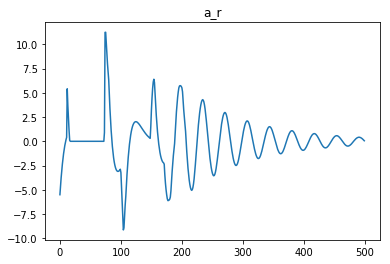

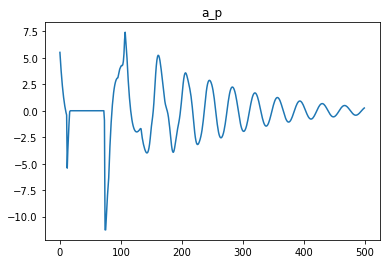

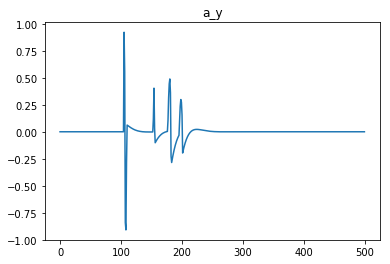

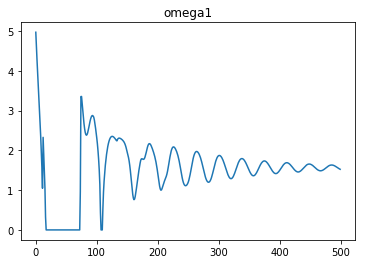

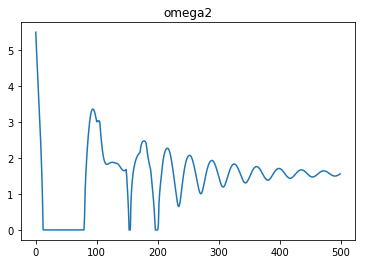

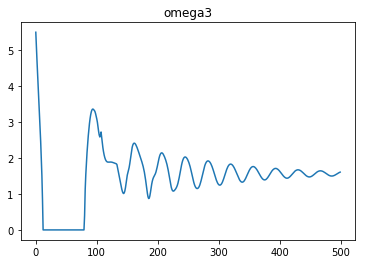

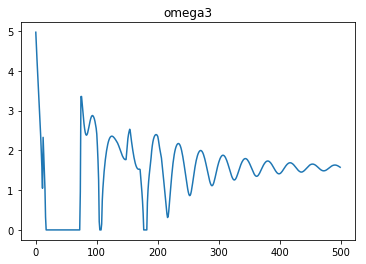

In [57]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.0001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

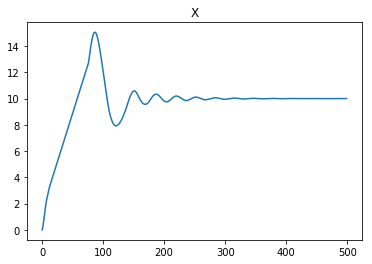

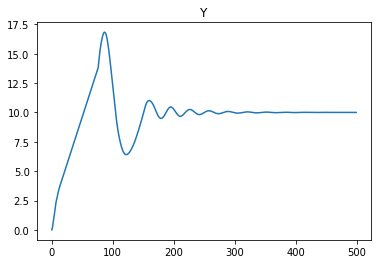

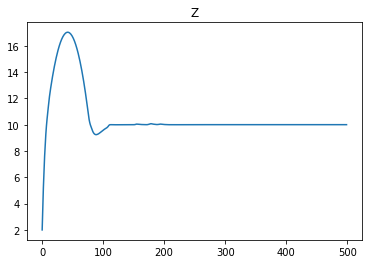

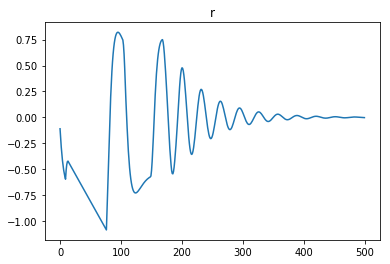

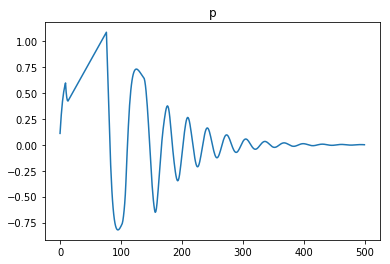

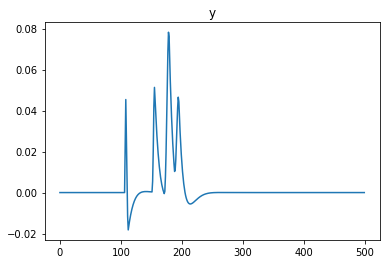

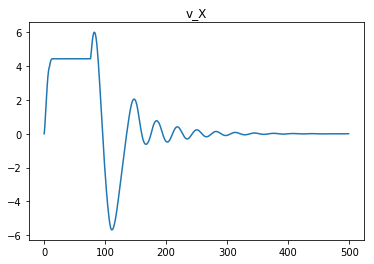

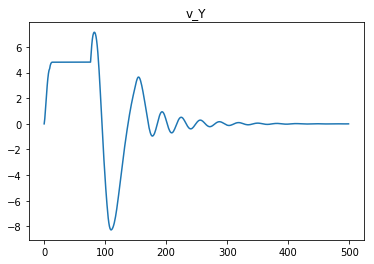

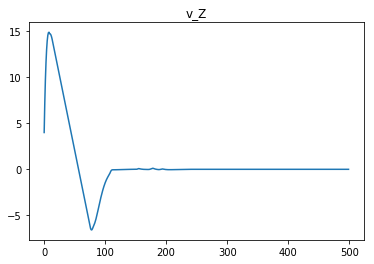

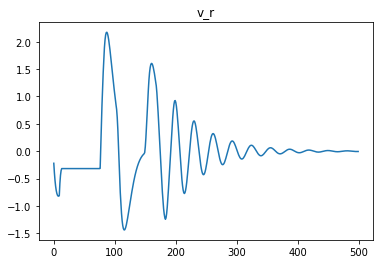

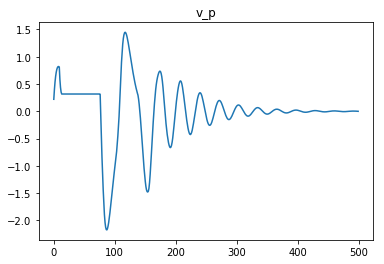

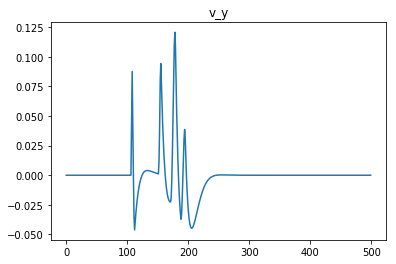

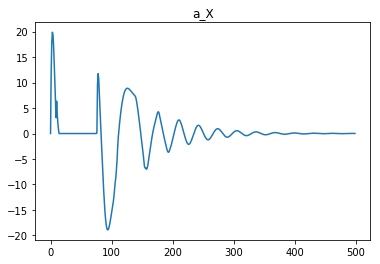

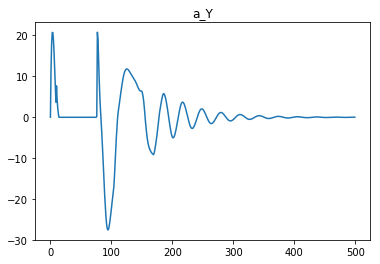

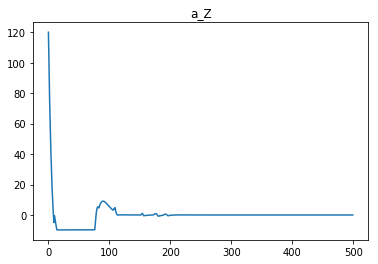

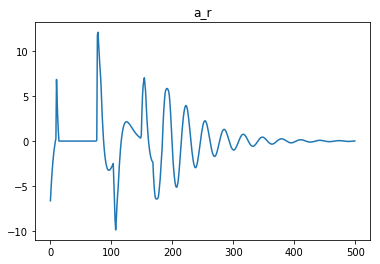

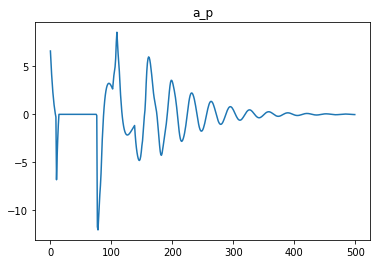

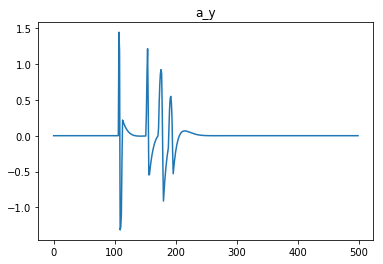

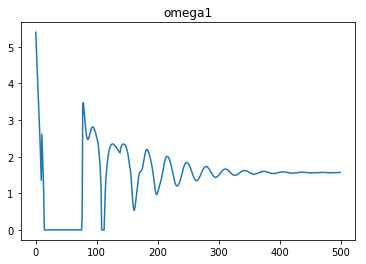

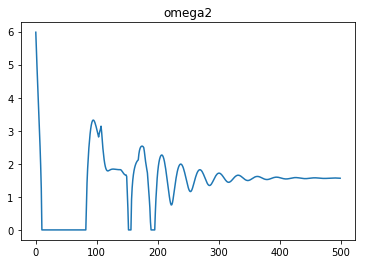

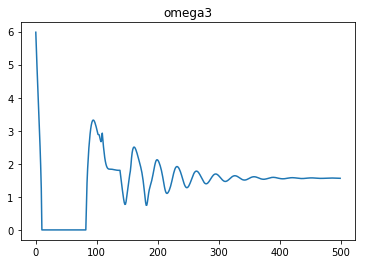

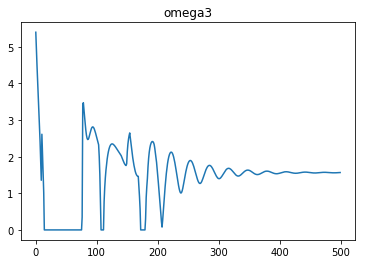

In [59]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)